In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#downloading the data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()
train_data['train_test'] = 1
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data["train_test"] = 0
all_data = pd.concat([train_data, test_data], axis=0)

## EDA

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
df_num = train_data[["Age", "SibSp", "Parch", "Fare"]]
df_cat = train_data[["Survived","Pclass", "Sex", "Ticket", "Cabin", "Embarked"]]

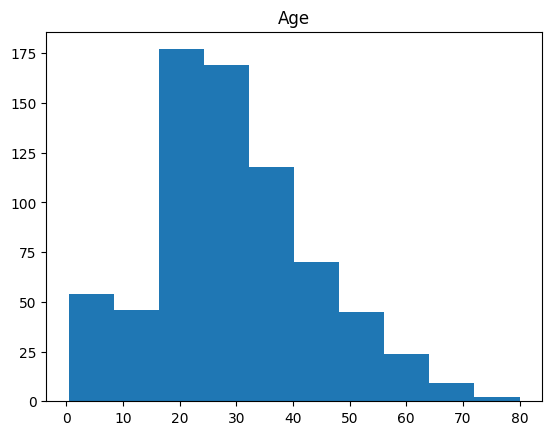

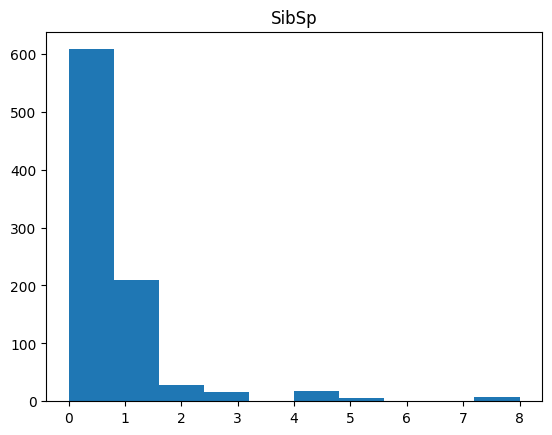

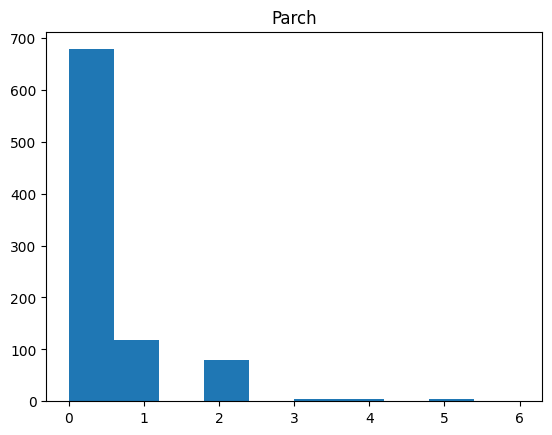

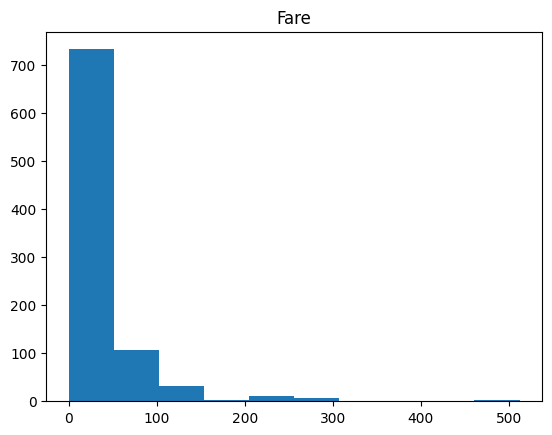

In [6]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [7]:
print(df_num.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


In [8]:
pd.pivot_table(train_data, index = "Survived", values = ["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


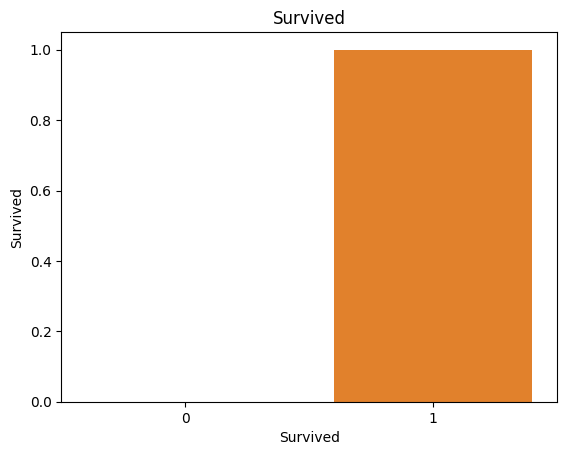

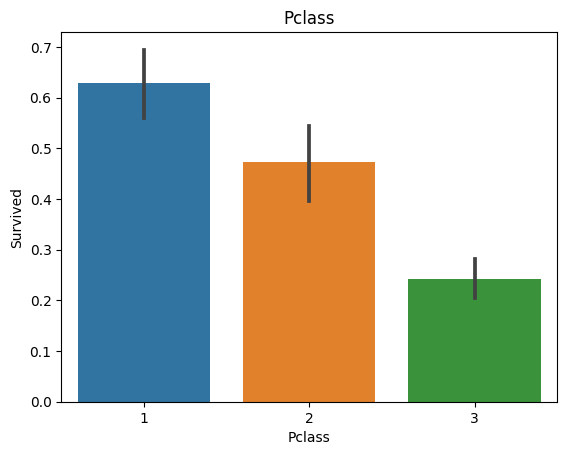

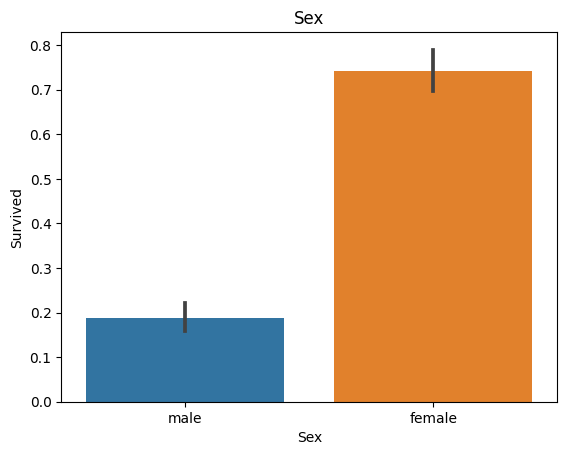

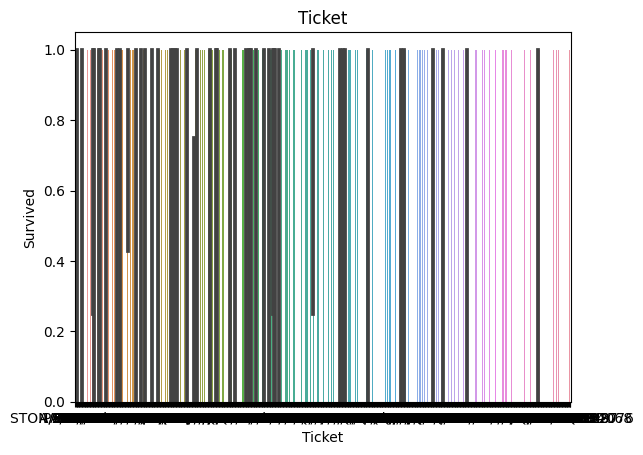

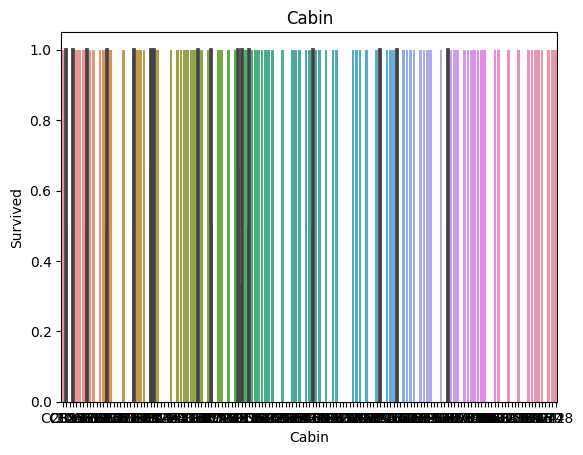

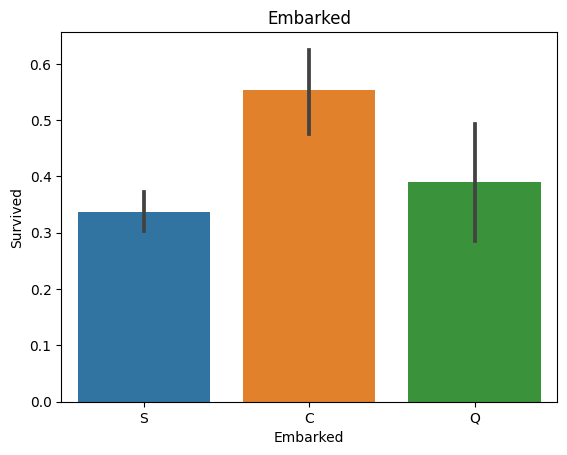

In [9]:
for i in df_cat.columns:
    sns.barplot(data = df_cat, x = i, y = "Survived").set_title(i)
    plt.show()

In [10]:
print(pd.pivot_table(train_data, index = "Survived", columns = "Pclass", values = "Ticket", aggfunc = 'count'))
print(pd.pivot_table(train_data, index = "Survived", columns = "Sex", values = "Ticket", aggfunc = 'count'))
print(pd.pivot_table(train_data, index = "Survived", columns = "Embarked", values = "Ticket", aggfunc = 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## Feature Engineering

In [11]:
df_cat.Cabin
train_data['cabin_multipl'] = train_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_data['cabin_multipl'].value_counts()


cabin_multipl
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [12]:
train_data["cabin_adv"] = train_data.Cabin.apply(lambda x: str(x)[0])
print(train_data.cabin_adv.value_counts())
pd.pivot_table(train_data, index = "Survived", columns = "cabin_adv", values = "Name", aggfunc='count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [13]:
train_data['numeric_ticket'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_data['ticket_letters'] = train_data.Ticket.apply(lambda x: "".join(x.split(' ')[:-1]).replace('.', '').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [14]:
train_data['numeric_ticket'].value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [15]:
pd.set_option("display.max_rows", 10)
train_data['ticket_letters'].value_counts()

ticket_letters
0          665
pc          60
ca          41
a5          21
stono2      18
          ... 
scow         1
fa           1
sop          1
sca4         1
casoton      1
Name: count, Length: 29, dtype: int64

In [16]:
pd.pivot_table(train_data, index ="Survived", columns = 'numeric_ticket', values = "Ticket", aggfunc = 'count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


## Data Preprocessing

(889,)

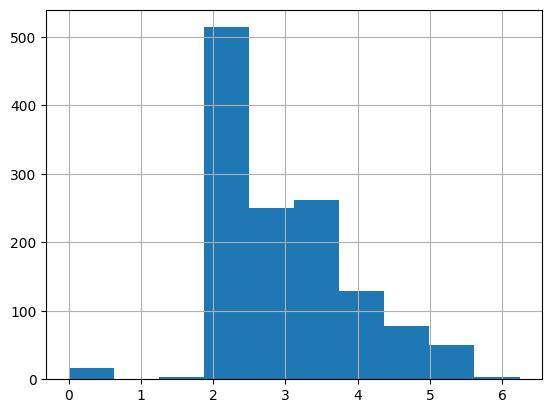

In [17]:
all_data["cabin_multiple"] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x : str(x)[0])
all_data["numeric_ticket"] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

all_data.Age = all_data.Age.fillna(train_data.Age.mean())
all_data.Fare = all_data.Fare.fillna(train_data.Fare.mean())

all_data.dropna(subset=['Embarked'], inplace = True)

all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

all_data.Pclass = all_data.Pclass.astype(str)

all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'train_test']])
X_train = all_dummies[all_dummies.train_test ==1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test == 1].Survived
y_train.shape

In [18]:
#Scale data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

## TrainData analysis using linear algebra

In [19]:
data1 = pd.concat([X_train, y_train], axis =1)
cov_matrix = data1.cov()
cov_matrix = cov_matrix.to_numpy()
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
numpy_array = data1.values

transform = eigenvectors[:,:2]


new_data = np.dot(numpy_array, transform)


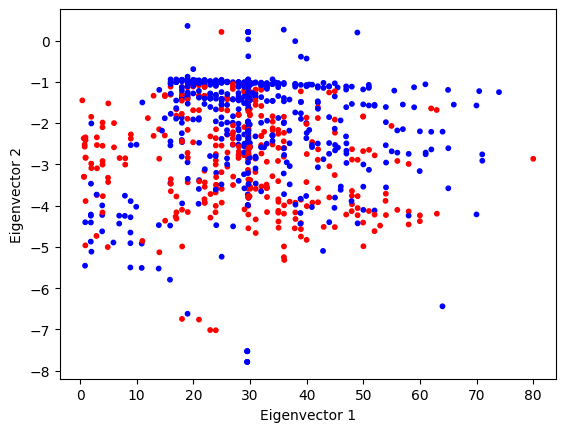

In [20]:
#plotting
survived_colors = y_train.map({0: 'blue', 1: 'red'})

plt.scatter(new_data[:,0], new_data[:,1], c = survived_colors, s = 10)

plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')

plt.show()

So, we can see some patterns, but anyway, we can't observe any strong distinctions between the data using eigenvectors.

## Model Building
Building of svm classifier using pytorch

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [22]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.78089888 0.80337079 0.78089888 0.79775281 0.82485876]
0.7975560210753507


In [23]:
svc_clf = SVC(probability = True)
cv = cross_val_score(svc_clf, X_train, y_train, cv =5)
print(cv)
print(cv.mean())

[0.6741573  0.73595506 0.68539326 0.70786517 0.71186441]
0.7030470386593028


In [24]:
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, X_train, y_train, cv =5)
print(cv)
print(cv.mean())

[0.7752809  0.80337079 0.85955056 0.79775281 0.82485876]
0.8121627626483845


In [25]:
voting_clf = VotingClassifier(estimators =[("lr", lr), ("xgb", xgb), ("svc_clf", svc_clf)])
cv = cross_val_score(voting_clf, X_train, y_train, cv =5)
print(cv)
print(cv.mean())

[0.78089888 0.82022472 0.85393258 0.80337079 0.83615819]
0.8189170316765061


## Model Tuning

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [27]:
def clf_performance(clf, model_name):
    print(model_name)
    print("Best Score "+ str(clf.best_score_))
    print("Best Parameters: "+ str(clf.best_params_))

In [28]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Logistic Regression
Best Score 0.8009204595949978
Best Parameters: {'C': 0.08858667904100824, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [29]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score 0.8223132101821875
Best Parameters: {'C': 1, 'degree': 2, 'kernel': 'poly'}


In [30]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score 0.8470259633085762
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.6}


In [31]:
best_lr = best_clf_lr.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [("lr", best_lr), ("svc", best_svc), ("xgb", best_xgb)], voting = 'hard')

voting_clf_soft = VotingClassifier(estimators = [("lr", best_lr), ("svc", best_svc), ("xgb", best_xgb)], voting = 'soft')

print(cross_val_score(voting_clf_hard, X_train_scaled, y_train, cv=5).mean())
print(cross_val_score(voting_clf_soft, X_train_scaled, y_train, cv=5).mean())

0.8279375357074843
0.8301720307243065


In [32]:
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[3,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_hard, param_grid = params, cv =5)
best_clf_weight =vote_weight.fit(X_train_scaled,y_train)

clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_

VC Weights
Best Score 0.8369136037580143
Best Parameters: {'weights': [1, 1, 2]}


In [33]:
#making predictions
voting_clf_soft.fit(X_train_scaled, y_train)

y_xgb = best_xgb.predict(X_test_scaled).astype(int)

y_hat_vc_soft = voting_clf_soft.predict(X_test_scaled).astype(int)

y_hat_vc_sub=voting_clf_sub.predict(X_test_scaled).astype(int)


In [34]:
# final_data0 ={'PassengerId': test_data.PassengerId,"survived":y_xgb}
# submission0 = pd.DataFrame(data=final_data0)

# final_data1 ={'PassengerId': test_data.PassengerId,"survived":y_hat_vc_soft}
# submission1 = pd.DataFrame(data=final_data1)

# final_data2 ={'PassengerId': test_data.PassengerId,"survived":y_hat_vc_sub}
# submission2 = pd.DataFrame(data=final_data2)